Before we analyze the data and draw out some Statistical conclusion we need to identify the problem statement and observe 
analysis carefully for better predictions.

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# READING THE INPUT CSV FILE
hotel_review = pd.read_csv('hotel_bookings.csv')

In [5]:
hotel_review.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [6]:
hotel_review.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [7]:
#Getting information regarding the data types and number of missing values in the dataset
hotel_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
#seperating numerical and categorical columns
categorical_columns=[]
numerical_columns=[]
for col in hotel_review.columns:
    if hotel_review[col].dtype!='object':
        numerical_columns.append(col)
    else:
        categorical_columns.append(col)

In [9]:
hotel_review.describe() # for numerical values

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
hotel_review[categorical_columns].describe()# Statistical relations for categorical values

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,10/21/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


CHECKING FOR MISSING VALUE

In [11]:
#As we saw earlier in the info method number of missing values in few of columns.
#Finding missing values in all columns
hotel_review.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# as company values cannot be filled accurately using any preprocessed techniques we drop the company column
# we do the same with agent as number of empty obsrevations are large in number
# fianlly we can remove the empty data observations for the Country column and dropping the columns can create significant 
# impact in the analysis

Getting a closer look on the 3 parameter having Missing values

In [13]:
# checking for corelation in missing data columns
check_for_corelation = hotel_review[['is_canceled','agent','company']]
check_for_corelation.corr()

,is_canceled,agent,company
is_canceled,1.000000,-0.083114,-0.020642
agent,-0.083114,1.000000,0.350746
company,-0.020642,0.350746,1.000000


In [14]:
# dropping Company column
hotel_review.drop(columns=['agent', 'company'],inplace=True)
hotel_review.dropna(axis=0,inplace=True)
hotel_review.shape

(118898, 30)

In [15]:
# removing the empty observation for country column
hotel_review.country.dropna()

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 118898, dtype: object

In [16]:
hotel_review.country.isna().sum()

0

In [17]:
# Lets copy data to check the correlation between variables. 
from sklearn.preprocessing import LabelEncoder, StandardScaler
corelation_of_data = hotel_review.copy()
le = LabelEncoder()

In [18]:
# for variables and thier correlation with other variables.
corelation_of_data['meal'] = le.fit_transform(corelation_of_data['meal'])
corelation_of_data['distribution_channel'] = le.fit_transform(corelation_of_data['distribution_channel'])
corelation_of_data['reserved_room_type'] = le.fit_transform(corelation_of_data['reserved_room_type'])
corelation_of_data['assigned_room_type'] = le.fit_transform(corelation_of_data['assigned_room_type'])
corelation_of_data['customer_type'] = le.fit_transform(corelation_of_data['customer_type'])
corelation_of_data['reservation_status'] = le.fit_transform(corelation_of_data['reservation_status'])
corelation_of_data['market_segment'] = le.fit_transform(corelation_of_data['market_segment'])
corelation_of_data['deposit_type'] = le.fit_transform(corelation_of_data['deposit_type'])
corelation_of_data['reservation_status_date'] = le.fit_transform(corelation_of_data['deposit_type'])
corelation_of_data['is_canceled'] = le.fit_transform(corelation_of_data['deposit_type'])

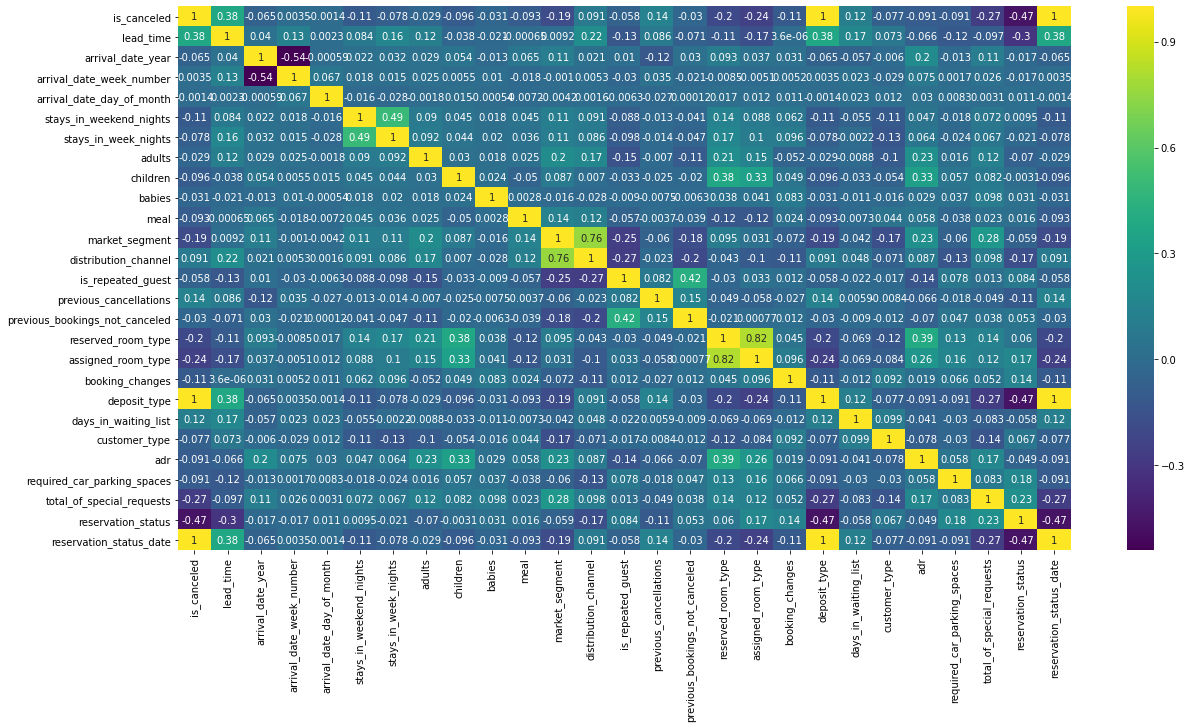

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(corelation_of_data.corr(),annot=True,cmap='viridis')

In [20]:
corelation_of_data.corr().is_canceled.sort_values(ascending = False)

reservation_status_date           1.000000
deposit_type                      1.000000
is_canceled                       1.000000
lead_time                         0.375216
previous_cancellations            0.139557
days_in_waiting_list              0.120946
distribution_channel              0.090936
arrival_date_week_number          0.003484
arrival_date_day_of_month        -0.001443
adults                           -0.029124
previous_bookings_not_canceled   -0.030425
babies                           -0.030513
is_repeated_guest                -0.057720
arrival_date_year                -0.064902
customer_type                    -0.076577
stays_in_week_nights             -0.077783
required_car_parking_spaces      -0.090538
adr                              -0.091193
meal                             -0.092620
children                         -0.096402
stays_in_weekend_nights          -0.112170
booking_changes                  -0.112293
market_segment                   -0.188147
reserved_ro

As we can see that reservation_status_date and deposit_type are perfectly correlated to the is_canceled which is our Dependent variable, we need to take care of them seperately later for getting better result we will be handling this at the time of the modeling.

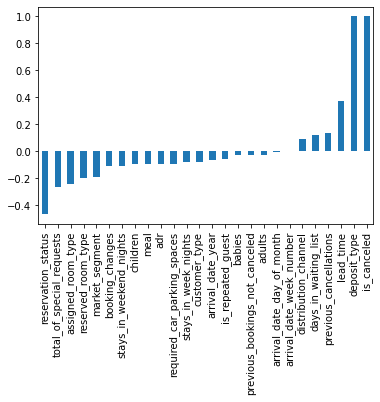

In [21]:
#graphical potray of the correlation values
corelation_of_data.corr()['is_canceled'][:-1].sort_values().plot(kind='bar')

ECPLORATORY DATA ANALYSIS

Having a closer look at the type of values inside different attributes

In [22]:
hotel_review.reservation_status.unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [23]:
hotel_review.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [24]:
hotel_review.customer_type.value_counts()

Transient          89174
Transient-Party    25078
Contract            4076
Group                570
Name: customer_type, dtype: int64

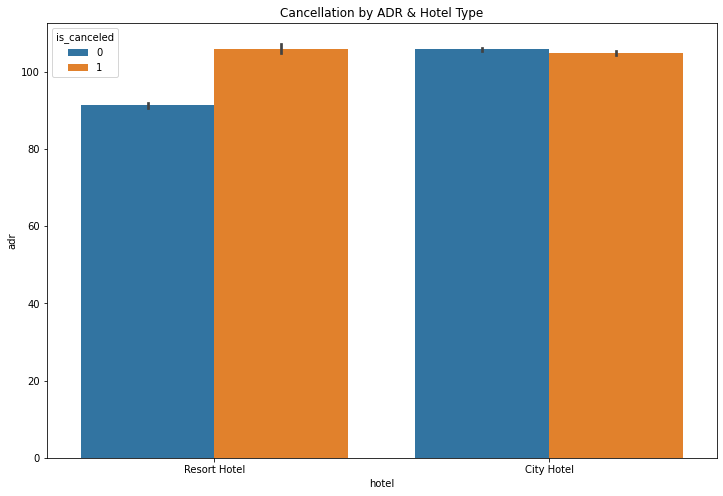

In [25]:
plt.figure(figsize=(12,8))
plt.title(label='Cancellation by ADR & Hotel Type')
sns.barplot(x='hotel',y='adr',hue='is_canceled',data=hotel_review)
plt.show()

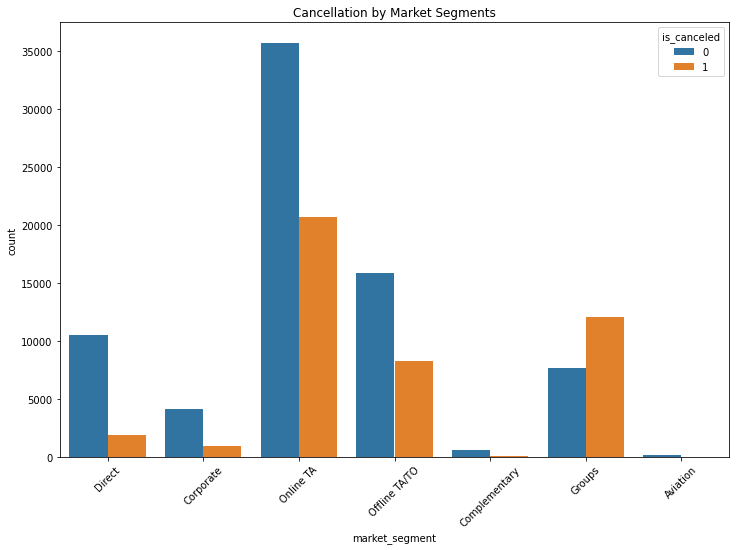

In [26]:
plt.figure(figsize=(12,8))
plt.title(label='Cancellation by Market Segments')
plt.xticks(rotation=45) 
sns.countplot(x='market_segment',hue='is_canceled',data=hotel_review)
plt.show()

CHECKING FOR THE MOST BUSIEST MONTH IN A YEAR

In [27]:
hotel_review.arrival_date_month.value_counts()

August       13852
July         12628
May          11779
October      11095
April        11045
June         10927
September    10467
March         9739
February      8012
November      6752
December      6728
January       5874
Name: arrival_date_month, dtype: int64

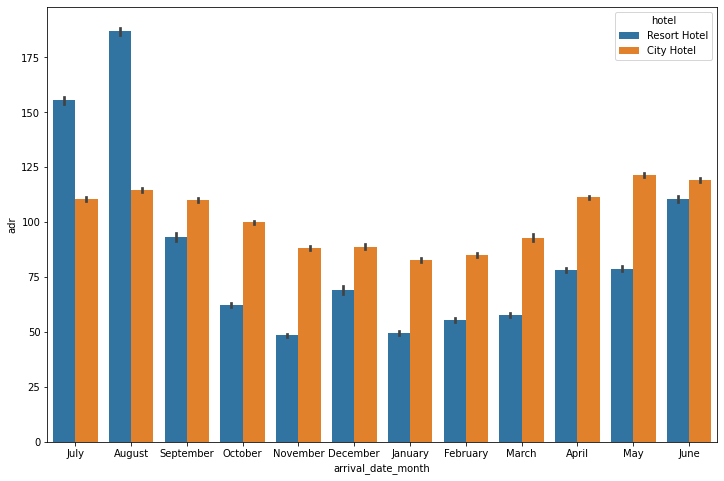

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(data = hotel_review, x= 'arrival_date_month',y='adr',hue='hotel')

In [29]:
most_occupied_month_price = hotel_review.groupby(['arrival_date_month','hotel']).sum().adr

In [30]:
most_occupied_month_price

arrival_date_month  hotel       
April               City Hotel       832163.75
                    Resort Hotel     278898.62
August              City Hotel      1030056.03
                    Resort Hotel     910832.27
December            City Hotel       367030.30
                    Resort Hotel     179805.54
February            City Hotel       422463.30
                    Resort Hotel     168942.93
January             City Hotel       308701.89
                    Resort Hotel     106201.21
July                City Hotel       895618.95
                    Resort Hotel     705929.96
June                City Hotel       939972.85
                    Resort Hotel     335347.26
March               City Hotel       598289.24
                    Resort Hotel     189648.79
May                 City Hotel      1001328.63
                    Resort Hotel     279575.20
November            City Hotel       383544.25
                    Resort Hotel     116134.99
October             City Ho

As we can see that August and July are the most occupied booking month.

In [31]:
# next we can look for the number of people and diffenrt variates of people come in
# combining the adults and children into one category as the expense is relatively the same and excluidng the babies
hotel_review['Family'] = hotel_review.adults + hotel_review.children 

In [32]:
# droping the existing columns
hotel_review.drop(columns=['adults','children','babies'],inplace=True)

In [33]:
hotel_review['Family'] = hotel_review['Family'].astype(int)

In [34]:
hotel_review.Family.dtype

dtype('int32')

Variation in price with respect to hotels

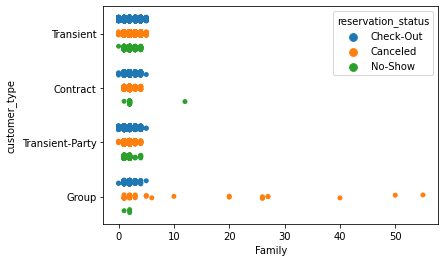

In [35]:
#Type of reservation made by strength of Customers.
sns.stripplot(data =hotel_review,x='Family',y='customer_type',hue='reservation_status',
    jitter=True,
    dodge=True,)

In [36]:
# now checking for which type of Hotel have more number of cancelations
# % of cancellations in City Hotel
hotel_review[hotel_review['hotel']=='City Hotel']['is_canceled'].value_counts(normalize=True)

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

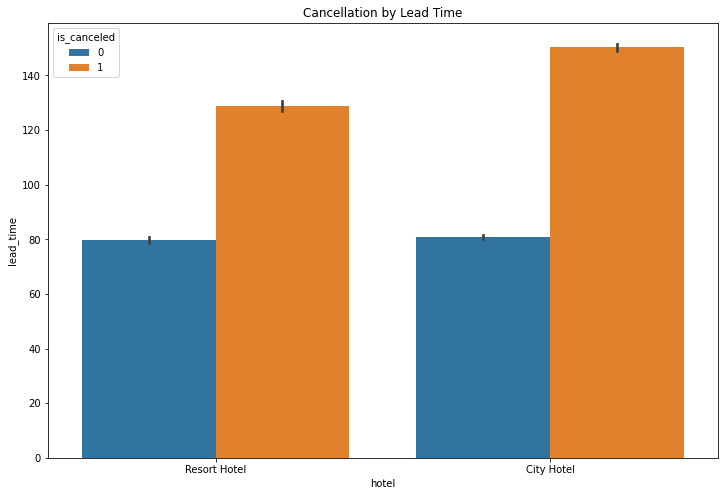

In [37]:
# cancelation with respect to time
plt.figure(figsize=(12,8))
plt.title(label='Cancellation by Lead Time')
sns.barplot(x='hotel',y='lead_time',hue='is_canceled',data=hotel_review)
plt.show()

MODEL PRE-PROCESSING

Converting the categorical features in the columns into numerical values, so that it easy and fast for the algorithm to learn the characteristics

In [38]:
# converting hotel and months into numerical value and mapping them
hotel_review['hotel'] = hotel_review['hotel'].map({'Resort Hotel':0, 'City Hotel':1})
hotel_review['arrival_date_month'] = hotel_review['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

In [39]:
hotel_review.country.nunique()

177

In [40]:
hotel_review.Family.value_counts()

2     82594
1     22299
3      9919
4      3797
0       170
5       104
26        5
27        2
20        2
55        1
50        1
40        1
12        1
10        1
6         1
Name: Family, dtype: int64

In [41]:
hotel_review.deposit_type.value_counts()

No Deposit    104163
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

As discussed earlier due to high correlation with these factors we will highly inaccurate results therefore we drop these columns

In [42]:
hotel_review.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Family'],
      dtype='object')

In [43]:
hotel_review.drop(columns="reservation_status_date", inplace=True, axis=1)

In [44]:
hotel_review.reservation_status.value_counts()

Check-Out    74745
Canceled     42950
No-Show       1203
Name: reservation_status, dtype: int64

In [45]:
hotel_review.drop(columns=['reservation_status'], inplace=True, axis=1)

In [46]:
hotel_review['country'] = le.fit_transform(hotel_review['country'])
hotel_review['deposit_type'] = le.fit_transform(hotel_review['deposit_type'])
hotel_review['adr'] = le.fit_transform(hotel_review['adr'])
hotel_review['market_segment'] = le.fit_transform(hotel_review['market_segment'])
hotel_review['meal'] = le.fit_transform(hotel_review['meal'])
hotel_review['distribution_channel'] = le.fit_transform(hotel_review['distribution_channel'])
hotel_review['reserved_room_type'] = le.fit_transform(hotel_review['reserved_room_type'])
hotel_review['assigned_room_type'] = le.fit_transform(hotel_review['assigned_room_type'])
hotel_review['customer_type'] = le.fit_transform(hotel_review['customer_type'])

In [47]:
hotel_review.shape

(118898, 26)

In [48]:
# APPLYING MACHINE LEARNING MODELS
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [49]:
y = hotel_review["is_canceled"]
X = hotel_review.drop(["is_canceled"], axis=1)

# SPLITTING THE DATA INTO 30 PERCENT TEST AND 70 PERCENT TRAINING DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [50]:
tree = DecisionTreeClassifier(max_depth = 10)

In [51]:
tree_model = tree.fit(X_train, y_train)

In [52]:
y_pred = tree_model.predict(X_test)
print('Decision Tree Model')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))

Decision Tree Model
Accuracy Score: 0.8338099243061396

Confusion Matrix:
 [[20005  2313]
 [ 3615  9737]]


In [53]:
# APPLYING RANDOM FORREST
rf_model = RandomForestClassifier(min_samples_leaf = 6, min_samples_split=6,
                                  n_estimators = 100)

# fitting of the model
estimator= rf_model.fit(X_train, y_train)
#Prediction of the Model
predict_rf = rf_model.predict(X_test)

In [54]:
RF_matrix = confusion_matrix(y_test, predict_rf)

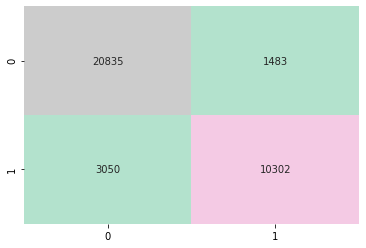

In [55]:
RF_matrix = confusion_matrix(y_test, predict_rf)
ax = plt.plot()
sns.heatmap(RF_matrix,annot=True, fmt="d", cbar=False, cmap="Pastel2")

In [56]:
rf_model.feature_importances_

array([0.01025849, 0.12384077, 0.02652785, 0.01971495, 0.03373675,
       0.0308061 , 0.01369056, 0.02199231, 0.00934457, 0.12105727,
       0.07160311, 0.01274129, 0.00188961, 0.04337232, 0.0049361 ,
       0.01109625, 0.02117607, 0.02156532, 0.19821067, 0.00166152,
       0.02971739, 0.05833787, 0.03098175, 0.07111613, 0.010625  ])

In [57]:
for name, importance in zip(X.columns, rf_model.feature_importances_):
    print(name, "=", importance)

hotel = 0.010258486064313024
lead_time = 0.12384076896578215
arrival_date_year = 0.02652785112201409
arrival_date_month = 0.019714948130503965
arrival_date_week_number = 0.033736748995380865
arrival_date_day_of_month = 0.0308061003035189
stays_in_weekend_nights = 0.013690560540868549
stays_in_week_nights = 0.02199230628994658
meal = 0.009344567753613331
country = 0.12105726727076721
market_segment = 0.071603108034803
distribution_channel = 0.01274128579724574
is_repeated_guest = 0.0018896085043026555
previous_cancellations = 0.043372318716042316
previous_bookings_not_canceled = 0.004936104078796708
reserved_room_type = 0.011096248178981714
assigned_room_type = 0.02117607075804172
booking_changes = 0.02156531852719469
deposit_type = 0.19821066598037215
days_in_waiting_list = 0.0016615217292027479
customer_type = 0.029717392560282732
adr = 0.058337868439623984
required_car_parking_spaces = 0.030981747829255474
total_of_special_requests = 0.07111613240485372
Family = 0.010625003024291878


        MODELLING WITH EXTREME GRADIENT BOOST

In [58]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

In [59]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [60]:
model = xgb.train(param, D_train, steps)

In [61]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.8284440869039074
Recall = 0.7998243101740188
Accuracy = 0.8287075974208018


The idea here is to understand the questions and train the model accordingly, whereas doing Exploratory data analysis give us a bright idea on the type and how the data is measured. Also, domain experience can play an important role in the analysis therefore, looking at the past and present terms we should understand the behavior of the model then take some meaningful decision on it. Finally, we need to be transparent on what is more preferable to our objective whether the precision or the recall is important to us, as there could be tradeoff between the two in most of the cases.